In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pyspark.pandas as ps
import warnings
warnings.filterwarnings("ignore")

spark =(
            SparkSession
                .builder
                .appName("PracticeApp")
                .master("local[4]")
    .config("spark.dynamicAllocation.enabled","false")
    .config("spark.sql.adaptive.enabled","false")
                .getOrCreate())
sc= spark.sparkContext
spark

In [5]:
#load each of the dataset
customer = (spark.read.option("header","true").csv("datasets/olist_customers_dataset.csv"))
geolocation = (spark.read.option("header","true").csv("datasets/olist_geolocation_dataset.csv"))
order_items = (spark.read.option("header","true").csv("datasets/olist_order_items_dataset.csv"))
order_reviews = (spark.read.option("header","true").csv("datasets/olist_order_reviews_dataset.csv"))
orders = (spark.read.option("header","true").csv("datasets/olist_orders_dataset.csv"))
payments = (spark.read.option("header","true").csv("datasets/olist_order_payments_dataset.csv"))
products = (spark.read.option("header","true").csv("datasets/olist_products_dataset.csv"))
sellers = (spark.read.option("header","true").csv("datasets/olist_sellers_dataset.csv"))


In [6]:
#printing schema for each
print("Customers Schema")
print(customer.printSchema())
print("\n")
print("Geolocation Schema")
print(geolocation.printSchema())
print("\n")
print("Order_items Schema")
print(order_items.printSchema())
print("\n")
print("Order Reviews Schema")
print(order_reviews.printSchema())
print("\n")
print("orders schema")
print(orders.printSchema())
print("\n")
print("Payment schema")
print(payments.printSchema())
print("\n")
print("Products Schema")
print(products.printSchema())
print("\n")
print("Sellers Schema")
print(sellers.printSchema())
print("\n")

Customers Schema
root
 |-- customer_id: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: string (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)

None


Geolocation Schema
root
 |-- geolocation_zip_code_prefix: string (nullable = true)
 |-- geolocation_lat: string (nullable = true)
 |-- geolocation_lng: string (nullable = true)
 |-- geolocation_city: string (nullable = true)
 |-- geolocation_state: string (nullable = true)

None


Order_items Schema
root
 |-- order_id: string (nullable = true)
 |-- order_item_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: string (nullable = true)
 |-- price: string (nullable = true)
 |-- freight_value: string (nullable = true)

None


Order Reviews Schema
root
 |-- review_id: string (nullable = true)
 |-- order_id: string (nullable = true)
 |-- rev

In [7]:
#Create a temp view for each of the dataset above

#Customer View
customer.createOrReplaceTempView("customerView")

#Geolocation View
geolocation.createOrReplaceTempView("geolocationView")

#Order Items View
order_items.createOrReplaceTempView("order_itemsView")

#Order Reviews View
order_reviews.createOrReplaceTempView("order_reviewsView")

#Orders View
orders.createOrReplaceTempView("ordersView")

#Payment View
payments.createOrReplaceTempView("paymentView")

#Products View
products.createOrReplaceTempView("productsView")

#Sellers View
sellers.createOrReplaceTempView("sellersView")

In [8]:
#Create queries to display 5 records from each table

#For customer
outCustomer = spark.sql("""
	SELECT * FROM customerView
""")

print("Customer Records")
customerDF = ps.DataFrame(outCustomer)
customerDF.head(5)

Customer Records


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
#For geolocation
outGeolocation = spark.sql("""
	SELECT * FROM geolocationView
""")

print("Geolocation Records")
geolocationDF = ps.DataFrame(outGeolocation)
geolocationDF.head(5)

Geolocation Records


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.54562128115268,-46.63929204800168,sao paulo,SP
1,01046,-23.546081127035535,-46.64482029837157,sao paulo,SP
2,01046,-23.54612896641469,-46.64295148361138,sao paulo,SP
3,01041,-23.5443921648681,-46.63949930627844,sao paulo,SP
4,01035,-23.541577961711493,-46.64160722329613,sao paulo,SP


In [10]:
#FOr Order_items
outOrderItems = spark.sql("""
	SELECT * FROM order_itemsView
""")

print("Order Items Records")
orderItemsDF = ps.DataFrame(outOrderItems)
orderItemsDF.head(5)

Order Items Records


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
#FOr Order Reviews
outOrderReviews = spark.sql("""
	SELECT * FROM order_reviewsView
""")

print("Order Reviews Records")
orderReviewsDF = ps.DataFrame(outOrderReviews)
orderReviewsDF.head(5)

Order Reviews Records


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
#FOr Order 
outOrders = spark.sql("""
	SELECT * FROM ordersView
""")

print("Orders Records")
ordersDF = ps.DataFrame(outOrders)
ordersDF.head(5)

Orders Records


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
#FOr Payment
outPayment = spark.sql("""
	SELECT * FROM paymentView
""")

print("Payment Records")
paymentDF = ps.DataFrame(outPayment)
paymentDF.head(5)

Payment Records


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
#FOr Products
outProducts = spark.sql("""
	SELECT * FROM productsView
""")

print("Prodct Records")
productDF = ps.DataFrame(outProducts)
productDF.head(5)

Prodct Records


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


In [15]:
#For Sellers
outSellers = spark.sql("""
	SELECT * FROM SellersView
""")

print("Sellers Records")
sellersDF = ps.DataFrame(outSellers)
sellersDF.head(5)

Sellers Records


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,04195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [16]:
# Question 1
#1) Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics
#of the dataset:

#1.1) Data type of all columns in the "customers" table.
print(customer.printSchema())

root
 |-- customer_id: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: string (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)

None


In [17]:
#1.2) Get the time range between which the orders were placed.
timerange = spark.sql("""
	SELECT MIN(order_purchase_timestamp) as Min_Time,MAX(order_purchase_timestamp) as Max_TIme
    FROM ordersView
    GROUP BY DATE(order_purchase_timestamp)
    ORDER BY DATE(order_purchase_timestamp)
""").show()
#timerangedf = ps.DataFrame(timerange)
#timerangedf

+-------------------+-------------------+
|           Min_Time|           Max_TIme|
+-------------------+-------------------+
|2016-09-04 21:15:19|2016-09-04 21:15:19|
|2016-09-05 00:15:34|2016-09-05 00:15:34|
|2016-09-13 15:24:19|2016-09-13 15:24:19|
|2016-09-15 12:16:38|2016-09-15 12:16:38|
|2016-10-02 22:07:52|2016-10-02 22:07:52|
|2016-10-03 09:44:50|2016-10-03 22:51:30|
|2016-10-04 09:06:10|2016-10-04 23:59:01|
|2016-10-05 00:32:31|2016-10-05 23:14:34|
|2016-10-06 00:06:17|2016-10-06 23:49:18|
|2016-10-07 00:54:40|2016-10-07 23:18:38|
|2016-10-08 01:28:14|2016-10-08 23:46:06|
|2016-10-09 00:56:52|2016-10-09 23:55:30|
|2016-10-10 00:01:50|2016-10-10 18:09:39|
|2016-10-22 08:25:27|2016-10-22 08:25:27|
|2016-12-23 23:16:47|2016-12-23 23:16:47|
|2017-01-05 11:56:06|2017-01-05 22:52:33|
|2017-01-06 13:43:16|2017-01-06 23:31:23|
|2017-01-07 00:34:47|2017-01-07 20:45:31|
|2017-01-08 09:35:07|2017-01-08 20:57:29|
|2017-01-09 00:37:18|2017-01-09 21:40:42|
+-------------------+-------------

In [18]:
#1.3) Count the number of Cities and States in our dataset
count = spark.sql("""
	SELECT COUNT(DISTINCT customer_city) AS City_Count,COUNT(DISTINCT customer_state) AS State_Count
    FROM customerView
""")
countDF = ps.DataFrame(count)
print("Count of city and states in customer dataset is")
countDF

Count of city and states in customer dataset is


,City_Count,State_Count
0,4119,27


In [19]:
count2 = spark.sql("""
	SELECT COUNT(DISTINCT geolocation_city) AS City_Count,COUNT(DISTINCT geolocation_state) AS State_Count
    FROM geolocationView
""")
countDF2 = ps.DataFrame(count2)
print("Count of city and states in Geolocation dataset is")
countDF2

Count of city and states in Geolocation dataset is


,City_Count,State_Count
0,8011,27


In [20]:
count3 = spark.sql("""
	SELECT COUNT(DISTINCT seller_city) AS City_Count,COUNT(DISTINCT seller_state) AS State_Count
    FROM sellersView
""")
countDF3 = ps.DataFrame(count3)
print("Count of city and states in Seller dataset is")
countDF3

Count of city and states in Seller dataset is


,City_Count,State_Count
0,611,23


In [21]:
#2. In-depth Exploration:
#1. Is there a growing trend in the no. of orders placed over the past years?

growingTrend = spark.sql(
    """
    	SELECT YEAR(o.order_purchase_timestamp) as year_placed,MONTH(o.order_purchase_timestamp) as
        month_placed,COUNT(o.order_id) as count_of_orders_placed
		FROM ordersView o
		INNER JOIN customerView c
		ON o.customer_id = c.customer_id
		GROUP BY year_placed,month_placed
		ORDER BY year_placed ASC 
    """
)

growingTrendDF = ps.DataFrame(growingTrend)
growingTrendDF.head(10)

#Solution : 
#Based on the results obtained it can be seen the there is an increase in the number of orders placed from 4 to 324
# and then dropped to a minimal of 1 in december
#FRom 2017 the number of orders shows a general increasing trend from January to November, with slight 
#fluctuations in between.
#IN 2018 the number of orders starts high in January and remains relatively stable until May. After May,
#there is a decreasing trend in order volume.

,year_placed,month_placed,count_of_orders_placed
0,2016,9,4
1,2016,10,324
2,2016,12,1
3,2017,3,2682
4,2017,8,4331
5,2017,10,4631
6,2017,7,4026
7,2017,12,5673
8,2017,9,4285
9,2017,4,2404


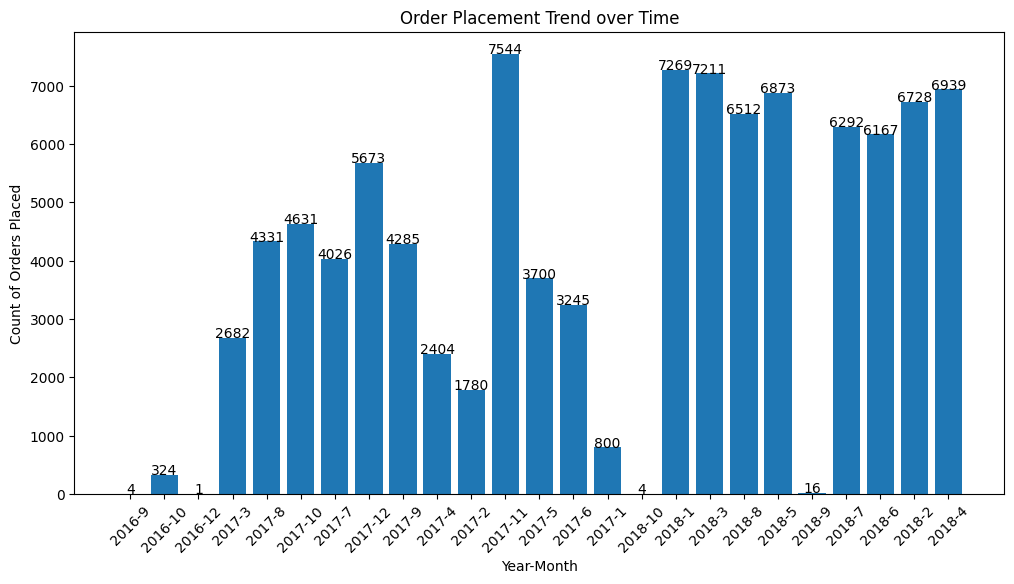

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(growingTrendDF)), growingTrendDF['count_of_orders_placed'].to_numpy())

for i, count in enumerate(growingTrendDF['count_of_orders_placed'].to_numpy()):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.xticks(range(len(growingTrendDF)), growingTrendDF['year_placed'].astype(str).to_numpy() + '-' + growingTrendDF['month_placed'].astype(str).to_numpy())

plt.xlabel('Year-Month')
plt.ylabel('Count of Orders Placed')
plt.title('Order Placement Trend over Time')

plt.xticks(rotation=45)

plt.show()

In [23]:
#2. Can we see some kind of monthly seasonality in terms of the no. of orders being placed?
#SOln) monthly seasonality refers to the regular and predictable fluctuations in certain variables or phenomena that can be observed 
#from one month to another. From the above output
#In september the no of orders placed in september 2017 was more when compared to 2016 and 2018
#In october the no of orders placed in october 2017 was more when compared to 2016 and 2018
#In november it was only 2017
#In december 2017 had the highest no of orders placed

In [24]:
#3) During what time of the day, do the Brazilian customers mostly place their orders? (Dawn, Morning, Afternoon or Night)
#▪ 0-6 hrs : Dawn
#▪ 7-12 hrs : Mornings
#▪ 13-18 hrs : Afternoon
#▪ 19-23 hrs : Night

brazil = spark.sql(
    """
    SELECT 
        (CASE WHEN HOUR(o.order_purchase_timestamp) BETWEEN 0 AND 6 THEN 'Dawn'
              WHEN HOUR(o.order_purchase_timestamp) BETWEEN 7 AND 12 THEN 'Morning'
              WHEN HOUR(o.order_purchase_timestamp) BETWEEN 13 AND 18 THEN 'Afternoon'
              WHEN HOUR(o.order_purchase_timestamp) BETWEEN 19 AND 23 THEN 'Night'
        END) AS time_slot,
        COUNT(*) AS order_count
    FROM ordersView o
    INNER JOIN customerView c
    ON o.customer_id = c.customer_id
    GROUP BY time_slot
    ORDER BY order_count DESC
    """
)

brazilDF = ps.DataFrame(brazil)
brazilDF


#SOlution
#The highest number of orders placed by the brazilian customers is during Afternoon having order count of
#38135

,time_slot,order_count
0,Afternoon,38135
1,Night,28331
2,Morning,27733
3,Dawn,5242


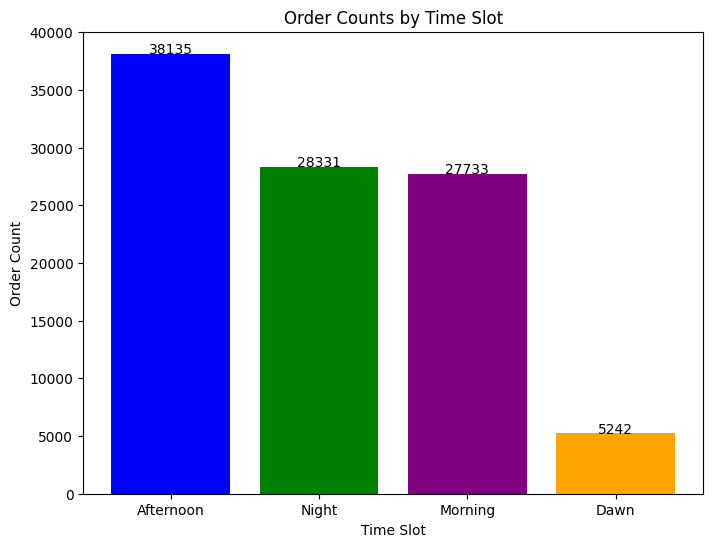

In [25]:
time_slots = brazilDF['time_slot'].to_numpy()
order_counts = brazilDF['order_count'].to_numpy()

colors = ['blue', 'green', 'purple', 'orange', 'purple']

plt.figure(figsize=(8, 6))
plt.bar(time_slots, order_counts,color = colors)
for i, count in enumerate(brazilDF['order_count'].to_numpy()):
    plt.text(i, count + 0.5, str(count), ha='center')
plt.xlabel('Time Slot')
plt.ylabel('Order Count')
plt.title('Order Counts by Time Slot')
plt.grid(False)

plt.show()

In [26]:
#3)Evolution of E-commerce orders in the Brazil region:
#1) Get the month on month no. of orders placed in each state.

monthonmonth = spark.sql("""
    WITH cte AS (
        SELECT month(CAST(o.order_purchase_timestamp AS date)) AS purchase_month,
        c.customer_state,
        COUNT(o.order_id) AS no_of_orders,
        LAG(month(CAST(o.order_purchase_timestamp AS date)), 1) OVER(PARTITION BY c.customer_state
        ORDER BY COUNT(o.order_id) DESC) AS lagged_month
        FROM ordersView o
        LEFT JOIN customerView c ON o.customer_id = c.customer_id
        GROUP BY month(CAST(o.order_purchase_timestamp AS date)), c.customer_state
    )
    SELECT purchase_month,customer_state,no_of_orders FROM cte
    ORDER BY purchase_month ASC
""")


monthonmonthDF = ps.DataFrame(monthonmonth)
monthonmonthDF

,purchase_month,customer_state,no_of_orders
0,1,SE,24
1,1,TO,19
2,1,SC,345
3,1,PI,55
4,1,RO,23
5,1,RN,51
6,1,AM,12
7,1,PE,113
8,1,PR,443
9,1,MT,96


In [27]:
#2)How are the customers distributed across all the states?
customercount = spark.sql(
    """
    SELECT customer_state,COUNT(customer_id) as count_of_customers
    FROM customerView
    GROUP BY customer_state
    Order BY count_of_customers DESC
    """
)
customercountDF = ps.DataFrame(customercount)
customercountDF.head(50)

,customer_state,count_of_customers
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


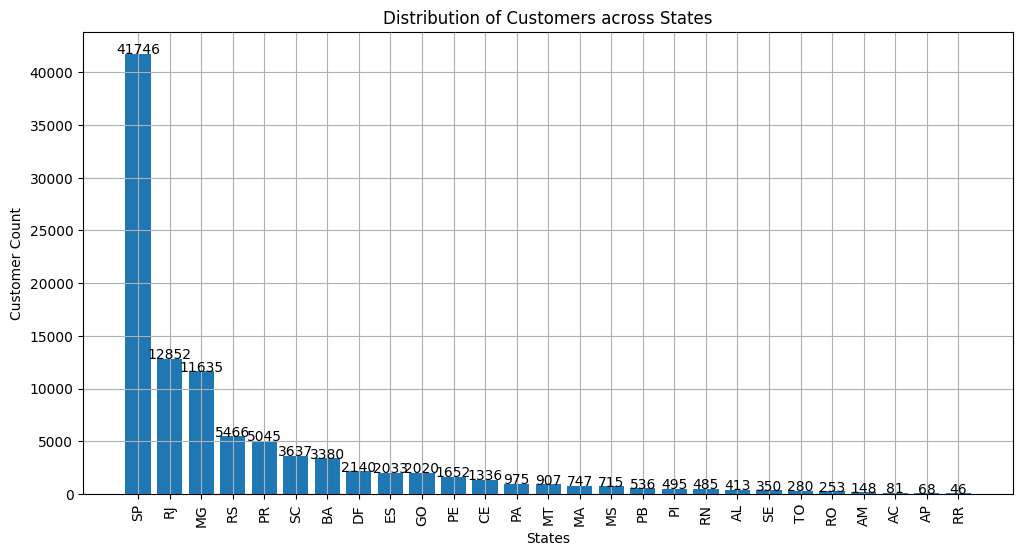

In [28]:

states = customercountDF['customer_state'].to_numpy()
customer_counts = customercountDF['count_of_customers'].to_numpy()

plt.figure(figsize=(12, 6))
plt.bar(states, customer_counts)
for i, count in enumerate(customercountDF['count_of_customers'].to_numpy()):
    plt.text(i, count + 0.5, str(count), ha='center')
plt.xlabel('States')
plt.ylabel('Customer Count')
plt.title('Distribution of Customers across States')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [29]:
#4) Impact on Economy: Analyze the money movement by e-commerce by looking at order prices, freight and others.
#4.1) Get the % increase in the cost of orders from year 2017 to 2018 (include months between Jan to Aug only).
#You can use the "payment_value" column in the payments table to get the cost of orders

percentIncrease = spark.sql("""
SELECT ((SUM(CASE WHEN YEAR(o.order_purchase_timestamp) = 2018 THEN p.payment_value ELSE 0 END)
    - SUM(CASE WHEN YEAR(o.order_purchase_timestamp) = 2017 THEN p.payment_value ELSE 0 END))
    / SUM(CASE WHEN YEAR(o.order_purchase_timestamp) = 2017 THEN p.payment_value ELSE 0 END)) * 100
    AS cost_increase_percentage
FROM ordersView o
INNER JOIN paymentView p ON
o.order_id = p.order_id
WHERE YEAR(o.order_purchase_timestamp) IN (2017,2018)
AND MONTH(o.order_purchase_timestamp) BETWEEN 1 AND 8
""")

percentIncreaseDF = ps.DataFrame(percentIncrease)
percentIncreaseDF

,cost_increase_percentage
0,136.976872


In [30]:
#4.2) Calculate the Total & Average value of order price for each state.
data = spark.sql(
    """
    	SELECT SUM(o.price) as Total_Price,AVG(o.price) as Average_Price
        FROM order_itemsView o
        INNER JOIN sellersView s
        ON o.seller_id = s.seller_id
        GROUP BY s.seller_state
    """
)

dataDF = ps.DataFrame(data)
dataDF.head(10)

,Total_Price,Average_Price
0,6.324261e+05,155.196582
1,4.762200e+03,340.157143
2,2.522000e+03,210.166667
3,1.177000e+03,392.333333
4,6.639921e+04,127.690788
5,1.707072e+04,117.729103
6,8.753396e+06,108.951684
7,4.768961e+04,128.197876
8,1.709500e+04,449.868421
9,3.785595e+05,172.150769


In [31]:
#4.2) Calculate the Total & Average value of order freight for each state.
data1 = spark.sql(
    """
    	SELECT SUM(o.freight_value) as Total_Price,AVG(o.freight_value) as Average_Price
        FROM order_itemsView o
        INNER JOIN sellersView s
        ON o.seller_id = s.seller_id
        GROUP BY s.seller_state
    """
)

dataDF1 = ps.DataFrame(data1)
dataDF1.head(10)

,Total_Price,Average_Price
0,106547.06,26.146518
1,712.78,50.912857
2,443.32,36.943333
3,81.80,27.266667
4,12565.50,24.164423
5,4631.73,31.942966
6,1482487.67,18.452213
7,12171.13,32.718091
8,1489.15,39.188158
9,57243.09,26.031419


In [32]:
#5)Analysis based on sales, freight and delivery time.
#5.1)Find the no. of days taken to deliver each order from the order’s purchase date as delivery time.
#Also, calculate the difference (in days) between the estimated & actual delivery date of an order.
#Do this in a single query.
noofDays = spark.sql(
    """
    SELECT order_id,(DATE(order_delivered_customer_date) - DATE(order_purchase_timestamp) ) as no_of_days,
    DATE(order_estimated_delivery_date) - DATE(order_delivered_customer_date) as estimated_days
    FROM ordersView
    """
)

noofDaysDF = ps.DataFrame(noofDays)
noofDaysDF

,order_id,no_of_days,estimated_days
0,e481f51cbdc54678b7cc49136f2d6af7,8 days,8 days
1,53cdb2fc8bc7dce0b6741e2150273451,14 days,6 days
2,47770eb9100c2d0c44946d9cf07ec65d,9 days,18 days
3,949d5b44dbf5de918fe9c16f97b45f8a,14 days,13 days
4,ad21c59c0840e6cb83a9ceb5573f8159,3 days,10 days
5,a4591c265e18cb1dcee52889e2d8acc3,17 days,6 days
6,136cce7faa42fdb2cefd53fdc79a6098,NaT,NaT
7,6514b8ad8028c9f2cc2374ded245783f,10 days,12 days
8,76c6e866289321a7c93b82b54852dc33,10 days,32 days
9,e69bfb5eb88e0ed6a785585b27e16dbf,18 days,7 days


In [33]:
#5.2)Find out the top 5 states with the highest & lowest average freight value.
top5_states = spark.sql(
    """
    WITH state_avg_freight AS (
        SELECT c.customer_state, AVG(oi.freight_value) AS avg_freight
        FROM order_itemsView oi
        INNER JOIN ordersView o ON oi.order_id = o.order_id
        INNER JOIN customerView c ON c.customer_id = o.customer_id
        GROUP BY c.customer_state
    )
    SELECT customer_state, avg_freight
    FROM state_avg_freight
    ORDER BY avg_freight DESC
    LIMIT 5
    """
)
top5DF = ps.DataFrame(top5_states)
top5DF

,customer_state,avg_freight
0,RR,42.984423
1,PB,42.723804
2,RO,41.069712
3,AC,40.073370
4,PI,39.147970


In [34]:
bottom5_states = spark.sql(
    """
    WITH state_avg_freight AS (
        SELECT c.customer_state, AVG(oi.freight_value) AS avg_freight
        FROM order_itemsView oi
        INNER JOIN ordersView o ON oi.order_id = o.order_id
        INNER JOIN customerView c ON c.customer_id = o.customer_id
        GROUP BY c.customer_state
    )
    SELECT customer_state, avg_freight
    FROM state_avg_freight
    ORDER BY avg_freight ASC
    LIMIT 5
    """
)
bottom5DF = ps.DataFrame(bottom5_states)
bottom5DF.head()

,customer_state,avg_freight
0,SP,15.147275
1,PR,20.531652
2,MG,20.630167
3,RJ,20.960924
4,DF,21.041355


In [35]:
#Find out the top 5 states with the highest & lowest average delivery time.
top5avg = spark.sql(
    """
    WITH top5avg AS (
        SELECT c.customer_state, AVG(CAST(o.order_estimated_delivery_date AS timestamp)) AS avg_delivery_date
        FROM customerView c
        INNER JOIN ordersView o ON c.customer_id = o.customer_id
        GROUP BY c.customer_state
    )
    SELECT * FROM top5avg
    ORDER BY avg_delivery_date DESC
    LIMIT 5
    """
)
top5avg.show()

bottom5avg = spark.sql(
    """
    WITH top5avg AS (
        SELECT c.customer_state, AVG(CAST(o.order_estimated_delivery_date AS timestamp)) AS avg_delivery_date
        FROM customerView c
        INNER JOIN ordersView o ON c.customer_id = o.customer_id
        GROUP BY c.customer_state
    )
    SELECT * FROM top5avg
    ORDER BY avg_delivery_date ASC
    LIMIT 5
    """
)
bottom5avg.show()

+--------------+--------------------+
|customer_state|   avg_delivery_date|
+--------------+--------------------+
|            AP|1.5179786470588236E9|
|            DF|1.5178605274766355E9|
|            MS|1.5172984523076923E9|
|            SP|1.5172669378910553E9|
|            PE|1.5172116886198547E9|
+--------------+--------------------+

+--------------+--------------------+
|customer_state|   avg_delivery_date|
+--------------+--------------------+
|            AC|1.5120527333333333E9|
|            RO| 1.514470090909091E9|
|            SE| 1.514615646857143E9|
|            AL|1.5151004324455206E9|
|            MA| 1.515196778313253E9|
+--------------+--------------------+



In [36]:
#6) Analysis based on the payments:
#6.1) Find the month on month no. of orders placed using different payment types.
monthOnMonth = spark.sql(
    """
    	
WITH cte AS (
        SELECT month(CAST(o.order_purchase_timestamp AS date)) AS purchase_month, p.payment_type,
        COUNT(o.order_id) AS no_of_orders, LAG(month(CAST(o.order_purchase_timestamp AS date)), 1) OVER(PARTITION
        BY p.payment_type ORDER BY COUNT(o.order_id) DESC) AS lagged_month
        FROM ordersView o
        INNER JOIN paymentView p
        ON o.order_id = p.order_id
        GROUP BY month(CAST(o.order_purchase_timestamp AS date)), p.payment_type
    )
    SELECT purchase_month,payment_type,no_of_orders FROM cte
    order by payment_type ASC,no_of_orders ASC
    """
)

monthOnMonthDF = ps.DataFrame(monthOnMonth)
monthOnMonthDF

,purchase_month,payment_type,no_of_orders
0,9,boleto,903
1,10,boleto,1056
2,12,boleto,1160
3,11,boleto,1509
4,1,boleto,1715
5,2,boleto,1723
6,4,boleto,1783
7,6,boleto,1807
8,3,boleto,1942
9,5,boleto,2035


In [37]:
#6.2) Find the no. of orders placed on the basis of the payment installments that have been paid.
paymentInstallments = spark.sql(
    """
    	SELECT p.payment_installments,COUNT(o.order_id) as no_of_orders
		FROM ordersView o
		INNER JOIN paymentView p
		ON o.order_id = p.order_id
        GROUP BY p.payment_installments
		ORDER BY p.payment_installments
    """
)
paymentInstallmentsDF = ps.DataFrame(paymentInstallments)
paymentInstallmentsDF.head(30)

,payment_installments,no_of_orders
0,0,2
1,1,52546
2,10,5328
3,11,23
4,12,133
5,13,16
6,14,15
7,15,74
8,16,5
9,17,8


In [38]:
#Misecellanous
#1)To find the count the number of orders which were paid using different methods

cards = spark.sql(
    """
    	SELECT p.payment_type as payment_type,COUNT(p.order_id) as count
		FROM paymentView p
		INNER JOIN ordersView o
		ON p.order_id = o.order_id
		GROUP BY p.payment_type
        ORDER BY count DESC
    """
)
cardsDF = ps.DataFrame(cards)
cardsDF

,payment_type,count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


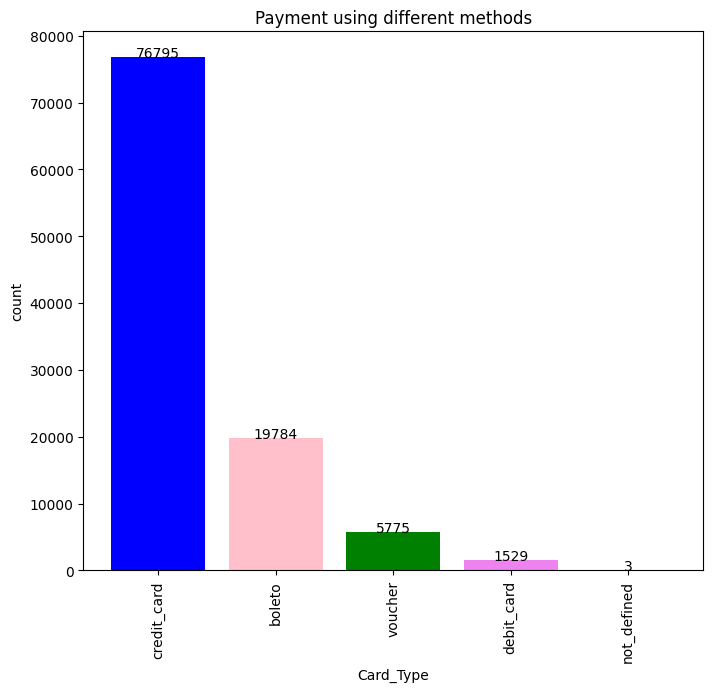

In [39]:
color = ["blue","pink","green","violet","gray"]
Card_Type = cardsDF['payment_type'].to_numpy()
count = cardsDF['count'].to_numpy()
plt.figure(figsize=(8,7))
plt.bar(Card_Type, count,color = color)
for i, count in enumerate(cardsDF['count'].to_numpy()):
    plt.text(i, count + 0.5, str(count), ha='center')
plt.xlabel('Card_Type')
plt.ylabel('count')
plt.title('Payment using different methods')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

In [40]:
#2) Count of customers whose orders are delivered,shipped etc
status = spark.sql(
    """
    SELECT o.order_status,COUNT(c.customer_id) as count_of_customers
	FROM ordersView o
	INNER JOIN customerView c
	ON o.customer_id = c.customer_id
	GROUP BY o.order_status
    ORDER BY count_of_customers DESC
    """
)
statusDF = ps.DataFrame(status)
statusDF

,order_status,count_of_customers
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


In [41]:
#4) TO find the count of seller cities in the seller states
seller_city_count = spark.sql(
    """
    SELECT seller_state,COUNT(seller_city) as count_city
	FROM SellersView
	GROUP BY seller_state
	ORDER BY count_city DESC
    """
)
seller_city_countDF = ps.DataFrame(seller_city_count)
seller_city_countDF

,seller_state,count_city
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171
5,RS,129
6,GO,40
7,DF,30
8,ES,23
9,BA,19


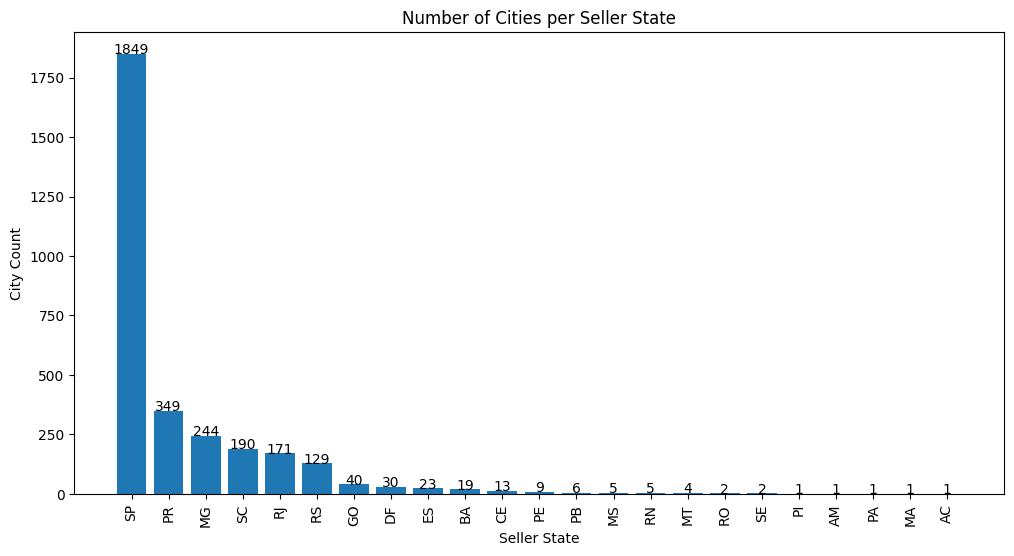

In [42]:
plt.figure(figsize=(12, 6))
plt.bar(seller_city_countDF['seller_state'].to_numpy(), seller_city_countDF['count_city'].to_numpy())

for i, count in enumerate(seller_city_countDF['count_city'].to_numpy()):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.xlabel('Seller State')
plt.ylabel('City Count')
plt.title('Number of Cities per Seller State')

plt.xticks(rotation=90)

plt.show()

In [43]:
#5) THe count of order ids which got highest review score
score = spark.sql(
    """
    SELECT review_score,COUNT(o.order_id) as count_of_orders
	FROM order_reviewsView r
	INNER JOIN ordersView o
	ON r.order_id = o.order_id
    GROUP BY review_score
    ORDER BY r.review_score ASC
    """
)
scoreDF = ps.DataFrame(score)
scoreDF

,review_score,count_of_orders
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


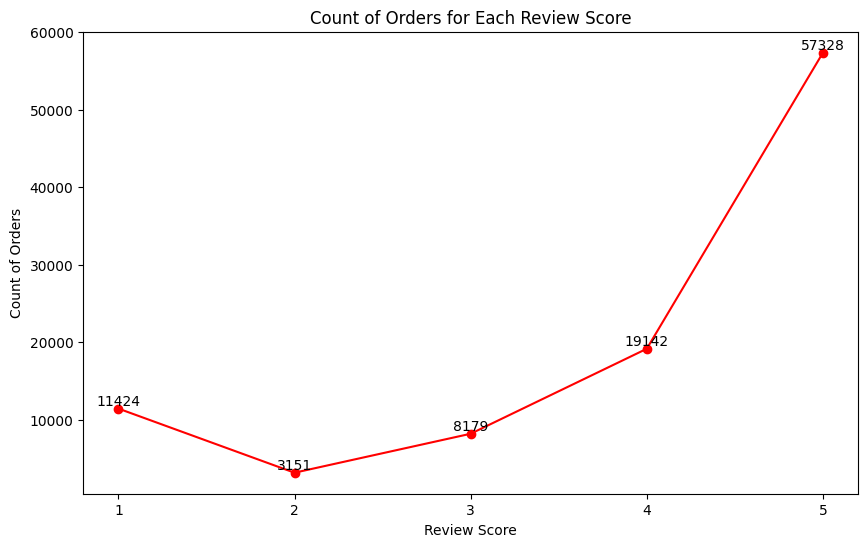

In [44]:
plt.figure(figsize=(10, 6))
line_color = "red"
plt.plot(scoreDF['review_score'].to_numpy(), scoreDF['count_of_orders'].to_numpy(), marker='o', linestyle='-',color = line_color)

for x, y in zip(scoreDF['review_score'].to_numpy(), scoreDF['count_of_orders'].to_numpy()):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Review Score')
plt.ylabel('Count of Orders')
plt.title('Count of Orders for Each Review Score')

# Display the plot
plt.show()

In [45]:
#6) Products which have the highest volume
volume = spark.sql("""
	WITH CTE AS 
	(
		SELECT product_id,product_length_cm,product_width_cm,product_height_cm,
		product_length_cm*product_width_cm*product_height_cm  as volume
        FROM productsView
	)

	SELECT product_id,volume
	FROM CTE
    ORDER BY volume DESC
""")
volumeDF = ps.DataFrame(volume)
volumeDF

,product_id,volume
0,256a9c364b75753b97bee410c9491ad8,296208.0
1,0b48eade13cfad433122f23739a66898,294000.0
2,f227e2d44f10f7dad30fb4dfa839e7a2,294000.0
3,3eb14e65e4208c6d94b7a32e41add538,294000.0
4,c1e0531cb1864fd3a0cae57dca55ca80,294000.0
5,90c1b4e040d1d1c45897ec2dad4a809d,293706.0
6,c6fdec160d0f8f488d9041316c85051d,288000.0
7,8d6f2c3454002d3f5aa7479a7fad7794,288000.0
8,99ff40856c47a638df807c0a144470cc,288000.0
9,0e9dfb804bafa3d68ef3ee7a621abfb2,287980.0


In [46]:
#PRinting the maximum and minimum value of volume
max_volume_product = volumeDF.loc[volumeDF['volume'].idxmax()]
min_volume_product = volumeDF.loc[volumeDF['volume'].idxmin()]

print("The product with id", max_volume_product['product_id'], "has the maximum volume of", max_volume_product['volume'])
print("The product with id", min_volume_product['product_id'], "has the minimum volume of", min_volume_product['volume'])

The product with id 256a9c364b75753b97bee410c9491ad8 has the maximum volume of 296208.0
The product with id 106392145fca363410d287a815be6de4 has the minimum volume of 168.0


In [47]:
#8)To find which payment type had the highest installment
installment = spark.sql("""
	SELECT payment_type,MAX(payment_installments) as count
	FROM paymentView
	GROUP BY payment_type
    ORDER BY count DESC
""")
installmentDF = ps.DataFrame(installment)
installmentDF

,payment_type,count
0,credit_card,9
1,boleto,1
2,not_defined,1
3,voucher,1
4,debit_card,1


In [48]:
#9)Count of people who gave reviews
review = spark.sql("""SELECT * FROM order_reviewsView""")

review_countDF = review.toPandas()

extractDF = review_countDF["review_comment_title"].value_counts()
solnDF = pd.DataFrame(extractDF)

solnDF.head(40)

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
Muito bom,247
Ótimo,240
Super recomendo,217
Ótimo,207


In [49]:
#10) To print all schemas in one go

dataFrames = {
	'customer':customer,
	'geolocation':geolocation,
	'order_items':order_items,
	'order_reviews':order_reviews,
	'orders':orders,
	'payments':payments,
	'products':products,
	'sellers':sellers
}
for table,dataframe in dataFrames.items():
    print(f"Schema for {table}:")
    dataframe.printSchema()
    print()

Schema for customer:
root
 |-- customer_id: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: string (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)


Schema for geolocation:
root
 |-- geolocation_zip_code_prefix: string (nullable = true)
 |-- geolocation_lat: string (nullable = true)
 |-- geolocation_lng: string (nullable = true)
 |-- geolocation_city: string (nullable = true)
 |-- geolocation_state: string (nullable = true)


Schema for order_items:
root
 |-- order_id: string (nullable = true)
 |-- order_item_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: string (nullable = true)
 |-- price: string (nullable = true)
 |-- freight_value: string (nullable = true)


Schema for order_reviews:
root
 |-- review_id: string (nullable = true)
 |-- order_id: string (nullable = true)
 |-- re